### Пример RFM - анализа

In [116]:
import pandas as pd

import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline

init_notebook_mode(connected = True)
cf.go_offline()

data = pd.read_csv(r'E:\репозитории\for_Python\RFM201810.csv', index_col=False, dtype= {'InvoiceNo' : 'str', 'CustomerCode' : 'str'})
data.head(10)

,InvoiceNo,CustomerCode,InvoiceDate,Amount
0,C0011810010001,19067290,2018-10-01 00:00:00.000,1716.00
1,C0011810010017,13233933,2018-10-01 00:00:00.000,1489.74
2,C0011810010020,99057968,2018-10-01 00:00:00.000,151.47
3,C0011810010021,80007276,2018-10-01 00:00:00.000,146.72
4,C0011810010024,13164076,2018-10-01 00:00:00.000,104.00
5,C0011810010026,13163946,2018-10-01 00:00:00.000,160.00
6,C0011810010033,13233767,2018-10-01 00:00:00.000,372.37
7,C0011810010040,13233754,2018-10-01 00:00:00.000,222.62
8,C0011810010053,80007255,2018-10-01 00:00:00.000,1522.00
9,C0011810010065,13233771,2018-10-01 00:00:00.000,487.46


In [117]:
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332730 entries, 0 to 332729
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     332730 non-null  object        
 1   CustomerCode  332730 non-null  object        
 2   InvoiceDate   332730 non-null  datetime64[ns]
 3   Amount        332730 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 10.2+ MB


In [118]:
data['CustomerCode'] = data['CustomerCode'].apply(str)
data['InvoiceNo'] = data['InvoiceNo'].apply(str)
data.max() # находим максимальную дату

InvoiceNo            S0081810310466
CustomerCode               99099972
InvoiceDate     2018-10-31 00:00:00
Amount                     131874.0
dtype: object

In [119]:
import datetime as dt
# сохраняем максимальную даты в переменную
last_date  = dt.datetime(2018,10,31)
last_date 

datetime.datetime(2018, 10, 31, 0, 0)

In [120]:
data.nunique()

InvoiceNo       332730
CustomerCode    123593
InvoiceDate         31
Amount          143450
dtype: int64

In [121]:

data_df = data.groupby('CustomerCode').agg({'InvoiceDate': lambda x: (last_date - x.max()).days, # Recency - Количество дней с последнего заказа
                                        'InvoiceNo': lambda x: len(x),      # Frequency - Количество заказов
                                        'Amount': lambda x: x.sum()}) # Monetary Value  - Общая сумма по всем заказам
data_df.columns = ['recency', 'frequence', 'monetary_value']
data_df

,recency,frequence,monetary_value
CustomerCode,,,
02213019,7,2,3770.76
02213042,23,3,9685.48
02213071,8,2,833.00
02213081,10,1,276.98
02213082,11,2,1215.96
...,...,...,...
99099927,11,1,961.10
99099936,1,1,1521.78
99099959,9,2,1444.56


In [122]:
# считаю квартили
qw = data_df.quantile(q=[0.25, 0.5, 0.75])
qw=qw.to_dict()
qw

{'recency': {0.25: 3.0, 0.5: 9.0, 0.75: 17.0},
 'frequence': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'monetary_value': {0.25: 765.08, 0.5: 1836.3, 0.75: 4014.01}}

In [123]:
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [124]:
data_df['R_Quartile'] = data_df['recency'].apply(RClass, args =('recency', qw))
data_df['F_Quartile'] = data_df['frequence'].apply(FMClass, args =('frequence', qw))
data_df['M_Quartile'] =  data_df['monetary_value'].apply(FMClass, args = ('monetary_value', qw))
data_df

,recency,frequence,monetary_value,R_Quartile,F_Quartile,M_Quartile
CustomerCode,,,,,,
02213019,7,2,3770.76,2,3,2
02213042,23,3,9685.48,4,2,1
02213071,8,2,833.00,2,3,3
02213081,10,1,276.98,3,4,4
02213082,11,2,1215.96,3,3,3
...,...,...,...,...,...,...
99099927,11,1,961.10,3,4,3
99099936,1,1,1521.78,1,4,3
99099959,9,2,1444.56,2,3,3


In [125]:
data_df['RFMClass'] = data_df['R_Quartile'].apply(str) \
                            + data_df['F_Quartile'].apply(str) \
                            + data_df['M_Quartile'].apply(str)

data_df

,recency,frequence,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerCode,,,,,,,
02213019,7,2,3770.76,2,3,2,232
02213042,23,3,9685.48,4,2,1,421
02213071,8,2,833.00,2,3,3,233
02213081,10,1,276.98,3,4,4,344
02213082,11,2,1215.96,3,3,3,333
...,...,...,...,...,...,...,...
99099927,11,1,961.10,3,4,3,343
99099936,1,1,1521.78,1,4,3,143
99099959,9,2,1444.56,2,3,3,233


In [126]:

rfm = data_df.reset_index(drop=True)
rfm.head()




,recency,frequence,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,7,2,3770.76,2,3,2,232
1,23,3,9685.48,4,2,1,421
2,8,2,833.00,2,3,3,233
3,10,1,276.98,3,4,4,344
4,11,2,1215.96,3,3,3,333


### Добавим визуализации

In [127]:
rfm['RFMClass'].value_counts()

444    10603
111     9712
443     6726
344     6578
211     5853
       ...  
424       63
114       60
214       60
314       33
414        2
Name: RFMClass, Length: 64, dtype: int64

<AxesSubplot: >

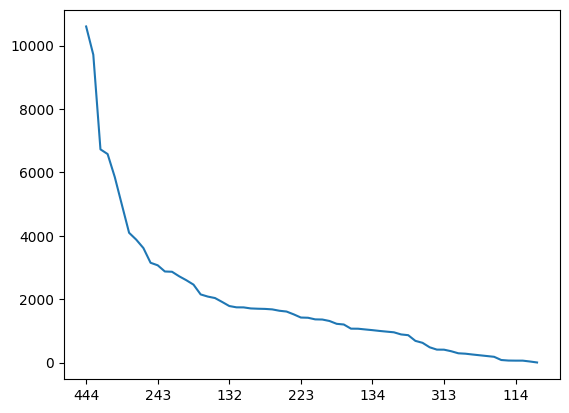

In [128]:
rfm['RFMClass'].value_counts().plot()

In [129]:
rfm['M_Quartile'].value_counts()

4    30900
2    30898
1    30898
3    30897
Name: M_Quartile, dtype: int64

<BarContainer object of 4 artists>

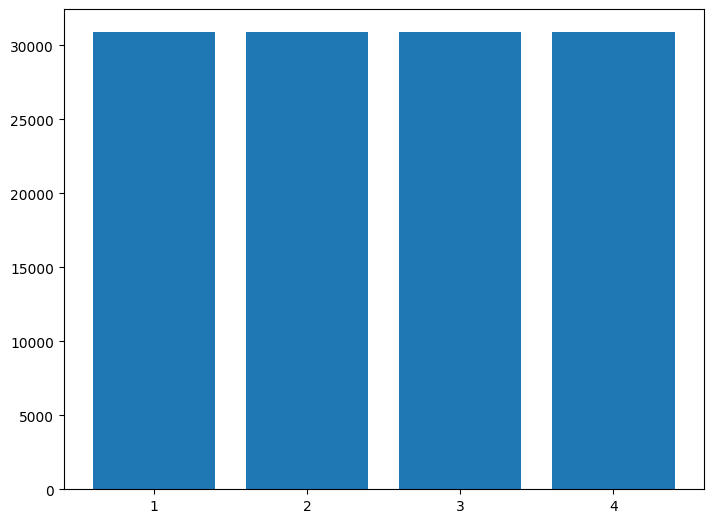

In [130]:
fig = plt.figure()
axes2 = fig.add_axes([0, 0, 1, 1])

axes2.bar(x=['1','2','3','4'],height = rfm['M_Quartile'].value_counts())

In [131]:
import plotly.io as pio
import plotly.graph_objs as go
pio.renderers.default = 'jupyterlab'
rfm.iplot(kind='scatter', x= 'recency' , y = 'monetary_value', mode = 'markers')

  